### Outline
1. Create dependencies and create path to data
2. Merge suicide rates and happiness into single DF
    a. Happiness DF
    b. Suicide DF
    c. Happiness + Suicide DF

### Visualizations
1. Horizontal Stacked Bar - Countries happiness + happiness indicators
2. Cartogram - Happiness heat map
3. Vertical Bar - Countries Happiness Level vs. Total Population Suicide Rate
4. Bottom 50 Happiness vs. Total Population Suicide Rate
5. Top 50 Happiness vs. Total Population Suicide Rate 
6. Scatter Plot - All Countries Happiness vs. Total Population Suicide Rate

ERROR: Could not find a version that satisfies the requirement Rcartogram (from versions: none)
ERROR: No matching distribution found for Rcartogram


In [16]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import rcartogram
import gmaps

# Import key
from config import key

# Pull original data
full_suicide_df=pd.read_csv("Data/2016 WHO Sucide Rate Estimates.csv", header=None,skiprows=[0,1])
happiness_df=pd.read_csv("Data/2016 World Happiness Report.csv")

# Clean suicide data by deleting duplicated country rows
almost_suicide_df=full_suicide_df.drop_duplicates(subset=[0],keep="first")

# Drop uncessary column in suicide dataframe
suicide_df=almost_suicide_df.drop([1],axis=1)

# Rename columns in suicide dataframe
suicide_df.rename(columns={0:'Country',2:'2016',3:'2015',4:'2014',5:'2013'},inplace=True)

# Merge data into single dataframe
merged_df=pd.merge(happiness_df,suicide_df,how="left",on=["Country","Country"])


merged_df.head()
# suicide_df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,2016,2015,2014,2013
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,9.2,8.6,9.3,12.7
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,11.3,11.4,11.3,16.8
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,13.3,12.9,12.3,16.0
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,10.1,10.2,10.6,12.0
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,13.8,12.4,16.6,21.6


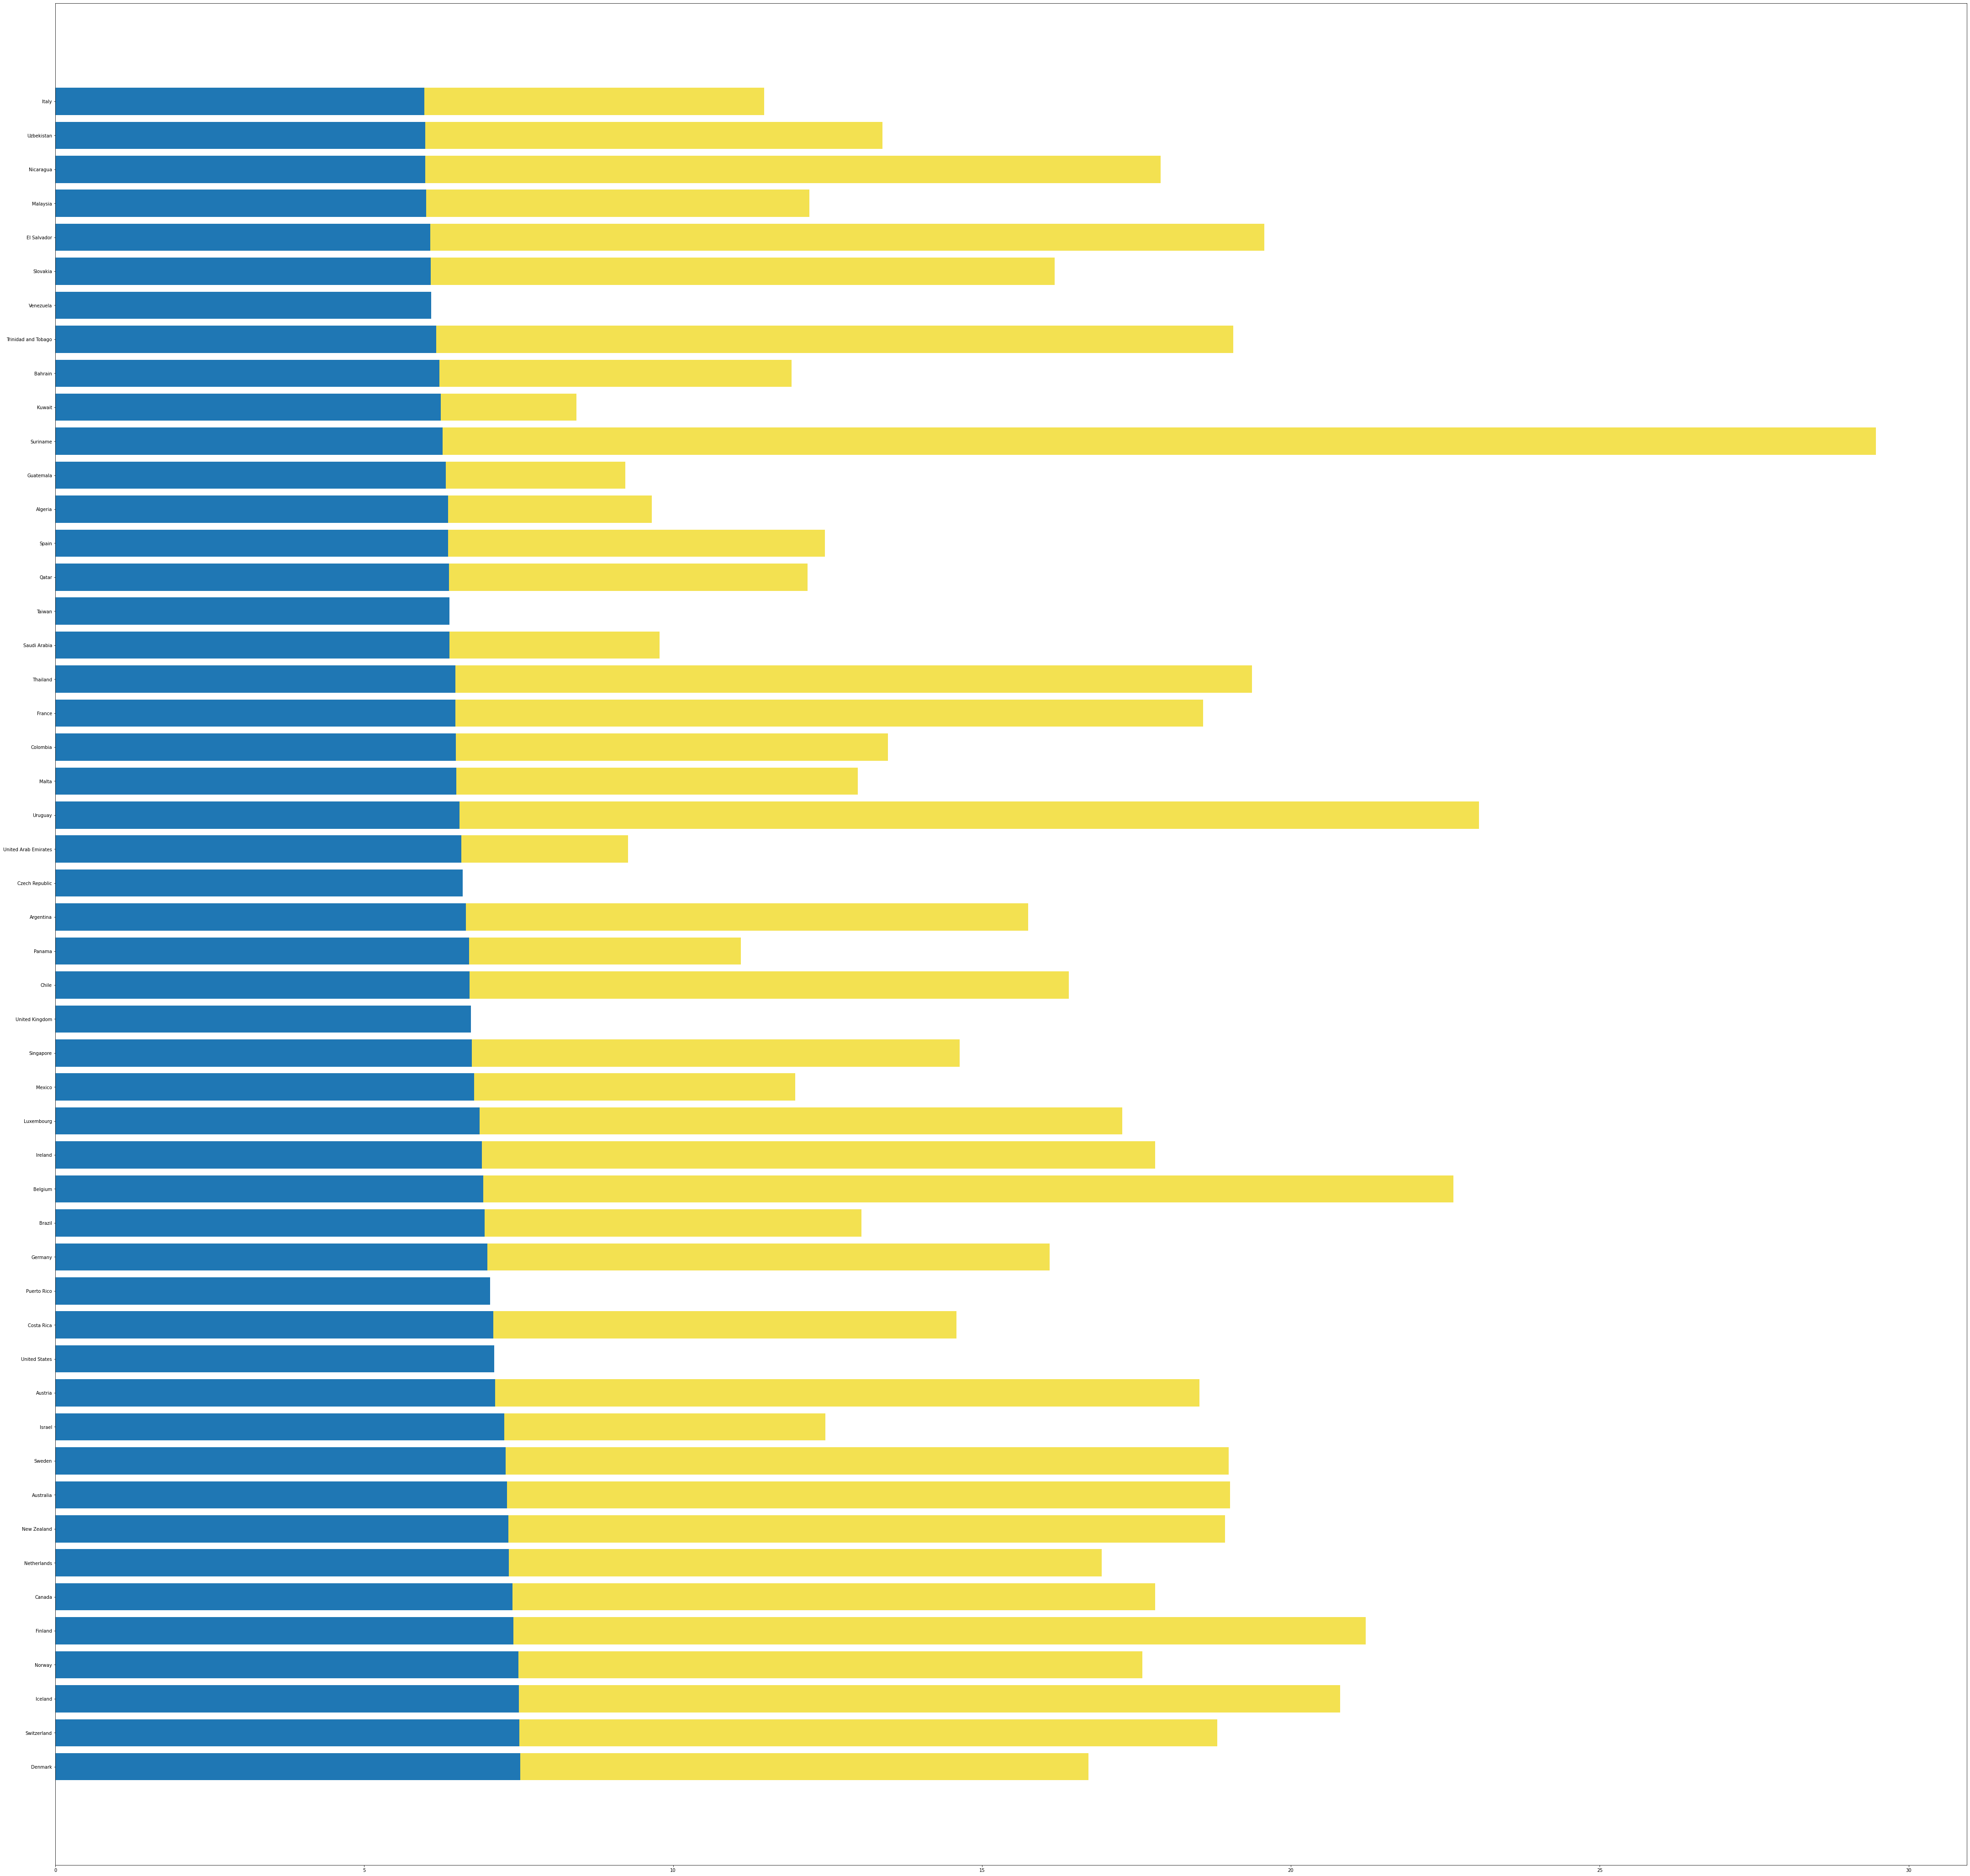

In [40]:
# # Calculate total population suicide rate per country
# Avg_Suicide_Rate=suicide_df

# Horizontal stacked bar chart
top50_df= merged_df.loc[0:49]
low50_df=merged_df.loc[107:156]


top_Happy_Score=top50_df["Happiness Score"]
top_Suicide_Rate=top50_df["2016"]
topIndex=top50_df["Country"]

plt.barh(topIndex,top_Happy_Score)
plt.barh(topIndex,top_Suicide_Rate,left=top_Happy_Score,color="#f3e151")
plt.rcParams["figure.figsize"]=(50,50)
plt.show()
